In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import scipy.stats as st
from sklearn import datasets, linear_model


# Loading the data to a dataframe

In [2]:
data = pd.read_csv('AdSmartABdata.csv')
data = pd.DataFrame(data)

# Exploring the data

In [3]:
data.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0

## Checking for missing and unique values

In [4]:
# cheking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


We have no missing values in our dataset.Thats great we can move to the next step and see if there are duplicates

In [5]:
## check for unique values
data.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

There is no duplicate data.data seems to have been collected over 8 days

In [246]:
yes = data[data['yes'] == 1]
no = data[data['no'] == 1]
neither = data[(data['yes'] == 0) & (data['no'] == 0)]
print('total users',len(data))
print('no of people who answered yes', len(yes))

print('no of people who answered no', len(no))
print('no of people who didnt answer', len(neither))
category = data.groupby(['experiment'])
exposed = data[data['experiment'] == 'exposed']
controlled = data[data['experiment'] == 'control']
print('no of people who belong to controlled group', len(controlled))
print('no of people who belong to exposed', len(exposed))


total users 8077
no of people who answered yes 572
no of people who answered no 671
no of people who didnt answer 6834
no of people who belong to controlled group 4071
no of people who belong to exposed 4006


In [204]:
#creating a seperate row that has all the user feedback in a new dataframe to ease the plotting process
ans = []
ans2 =[]
for ind in data.index:
    if((data['yes'][ind]) == 1):
        x=1
        x1 = 'yes'
        ans.append(x)
        ans2.append(x1)
    elif((data['no'][ind] == 1)):
        print ('no')
        y=0
        y2 = 'no'
        ans.append(y)
        ans2.append(y2)
    elif(((data['yes'][ind] == 0 )& (data['no'][ind] == 0))):
        print ('none')
        z=2
        z1 = 'no answer'
        ans.append(z)
        ans2.append(z1)

none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
none
none
no
none
no
none
none
none
none
none
none
none
no
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
no
no
none
none
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no

In [205]:
anss = pd.DataFrame(ans)
ans2 = pd.DataFrame(ans2)
#data2 =pd.concat([data,anss],axis=1)
data3 = pd.concat([data,ans2],axis=1)

In [206]:
data3.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no          0  
0  Generic Smartphone            6          Chrome Mobile    0   0  no answer  
1  Generic Smartphone            6          Chrome Mobile    0   0  no answer  
2               E5823            6  Chrome Mobile WebView    0   1         no  
3   Samsung SM-A705FN            6               Facebook    0   0  no answer  
4  Generic Smartphone            6          Chrome Mobile    0   0  no answer

In [208]:
#data2 = data2.rename(columns={0:'answere'})
#data2
data3 = data3.rename(columns={0:'answere'})
data3

auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1     000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3     00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4     001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8072  ffea24ec-cec1-43fb-b1d1-8f93828c2be2    exposed  2020-07-05     7   
8073  ffea3210-2c3e-426f-a77d-0aa72e73b20f    control  2020-07-03    15   
8074  ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7    control  2020-07-04     9   
8075  ffeeed62-3f7c-4a6e-8ba7-95d303d40969    exposed  2020-07-05    15   
8076  fffbb9ff-568a-41a5-a0c3-6866592f80d8    control  2020-07-10    14   

             device_make  platform_os                browser  yes  no  \
0     Generic Smartphone            6          Chrome Mobile    0   0   
1     Generic Smartphone            6          Chrome Mobile    0   0   
2                  E5823            6  Chrome Mobile WebView    0   1   
3      Samsung SM-A705FN            6               Facebook    0   0   
4     Generic Smartphone            6          Chrome Mobile    0   0   
...                  ...          ...                    ...  ...  ..   
8072  Generic Smartphone            6          Chrome Mobile    0   0   
8073  Generic Smartphone            6          Chrome Mobile    0   0   
8074  Generic Smartphone            6          Chrome Mobile    0   0   
8075    Samsung SM-A515F            6       Samsung Internet    0   0   
8076    Samsung SM-G960F            6               Facebook    0   0   

        answere  
0     no answer  
1     no answer  
2            no  
3     no answer  
4     no answer  
...         ...  
8072  no answer  
8073  no answer  
8074  no answer  
8075  no answer  
8076  no answer  

[8077 rows x 10 columns]

## Plotting the data

Text(0.5, 1.0, 'A barplot showing the number of users belonging to the exposed and controll group')

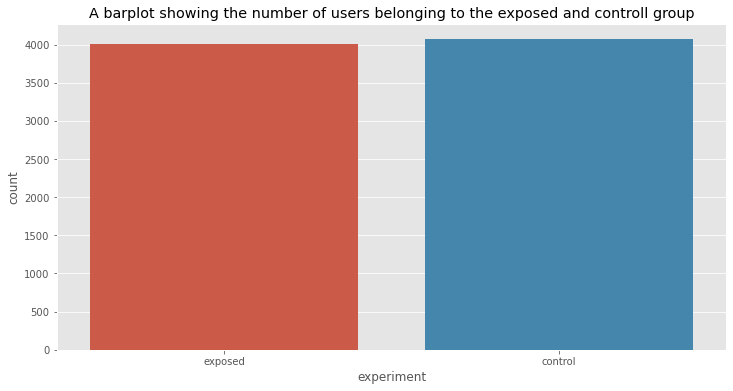

In [233]:
figure(figsize=(12,6))

sns.countplot(data= data2,x='experiment')
plt.title('A barplot showing the number of users belonging to the exposed and controll group')

Text(0.5, 1.0, 'A barplot showing the distribution of how the users answered the question')

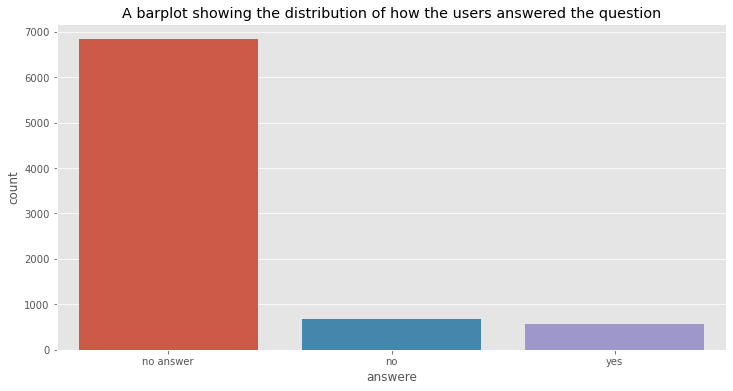

In [229]:
from matplotlib.pyplot import figure, show
from seaborn import countplot

figure(figsize=(12,6))
sns.countplot(data=data3,x='answere')

plt.title('A barplot showing the distribution of how the users answered the question')

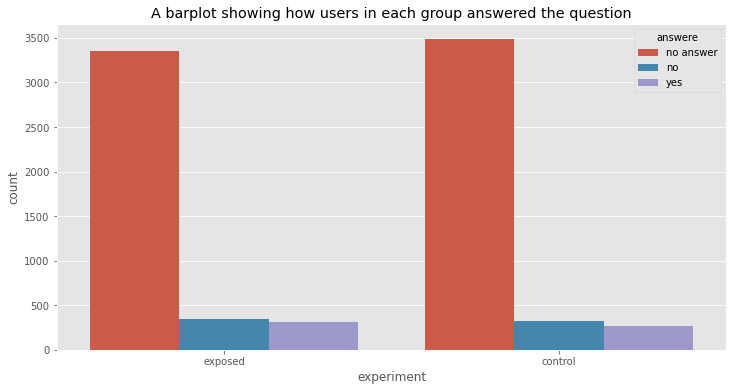

In [232]:
figure(figsize=(12,6))
plt.title('A barplot showing how users in each group answered the question')
sns.countplot(data = data3,x='experiment',hue = 'answere')


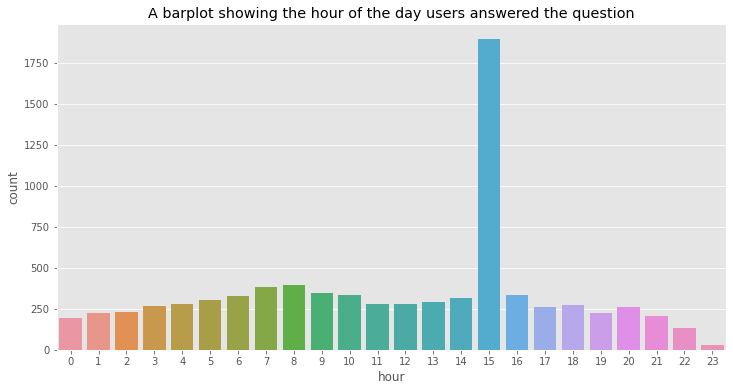

In [468]:
figure(figsize=(12,6))
plt.title('A barplot showing the hour of the day users answered the question')

sns.countplot(data = data3, x='hour')

C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


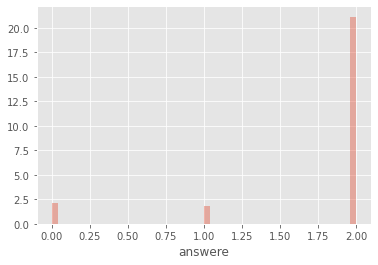

In [214]:
sns.distplot(data2.answere)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

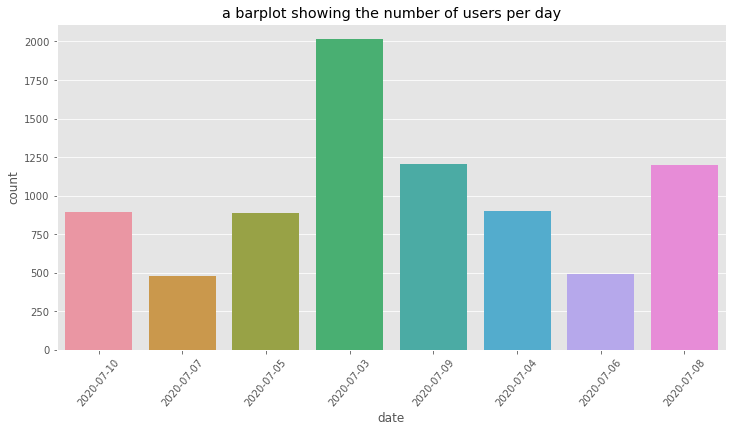

In [241]:
figure(figsize=(12,6))

sns.countplot(data = data2,x='date')
plt.title('a barplot showing the number of users per day')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

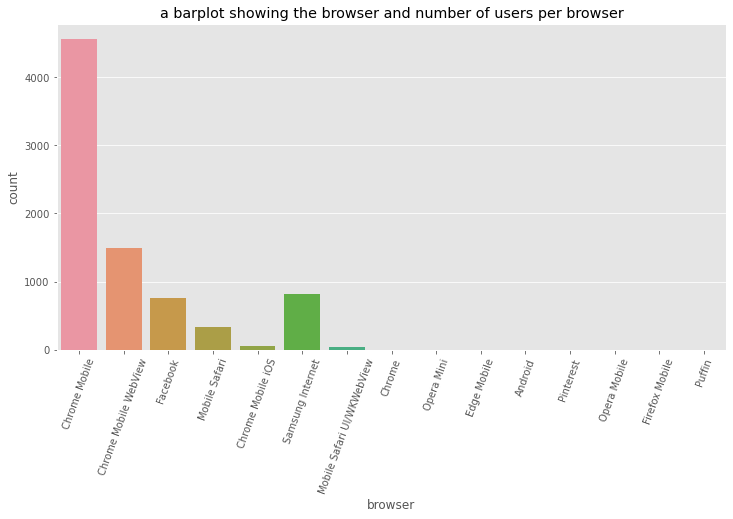

In [469]:
figure(figsize=(12,6))
plt.title('a barplot showing the browser and number of users per browser')

sns.countplot(x='browser',data=data2)
plt.xticks(rotation=70)

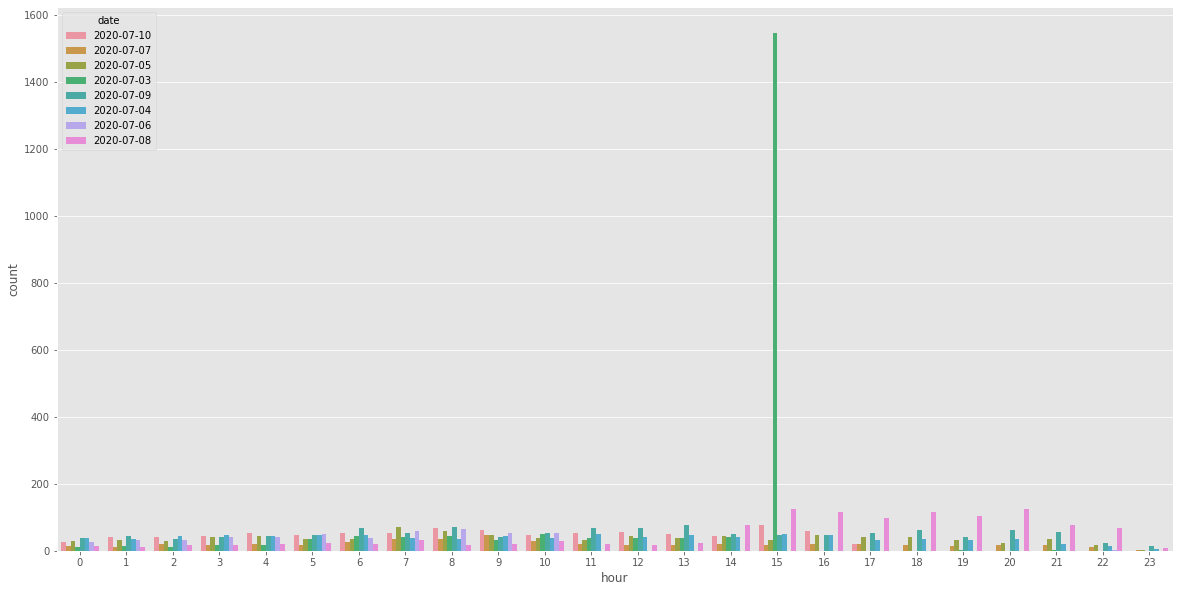

In [238]:
figure(figsize=(20,10))

sns.countplot(data = data2, x='hour',hue = 'date')

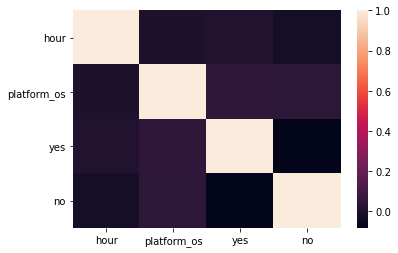

In [18]:
corr = data.corr()
sns.heatmap(corr)

C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


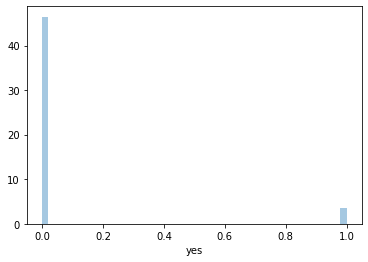

In [19]:
sns.distplot(data.yes)

# Classical A/B testing

Since many users did not answere the survey we are going to drop them and use those who answered

In [260]:
#dropping users who did not answere
answered = data2.drop(['yes','no'], axis=1)
answered = data2[data2['answere'] != 2]
exposed = answered[answered['experiment'] == 'exposed']
control = answered[answered['experiment'] == 'control']
print('number of users who answered',len(answered))
print('number of people who answered belonging to exposed',len(exposed))
print('number of people who answered belonging to control',len(control))
print('number of users who answered yes in the exposed group',len(exposed[exposed['answere']==1]))
print('number of users who answered no in the exposed group',len(exposed[exposed['answere']==0]))
print('number of users who answered yes in the controll group',len(control[control['answere']==1]))
print('number of users who answered no in the controll group',len(control[control['answere']==0]))

number of users who answered 1243
number of people who answered belonging to exposed 657
number of people who answered belonging to control 586
number of users who answered yes in the exposed group 308
number of users who answered no in the exposed group 349
number of users who answered yes in the controll group 264
number of users who answered no in the controll group 322


the number of users who answered the question are 1243

In [264]:

exposed1 = len(exposed)
controll1 = len(control)
yes_e,yes_c=len(exposed[exposed['yes'] == 1]),len(control[control['yes'] == 1])
rate_e,rate_c =yes_e/exposed1,yes_c/controll1


## Modelling exposure rate

Users can either answere yes or on making this a binomial distribution with some unknown rate for the exposed and controlled group.We dont know the true exposure rate but we can estimate it using our sample

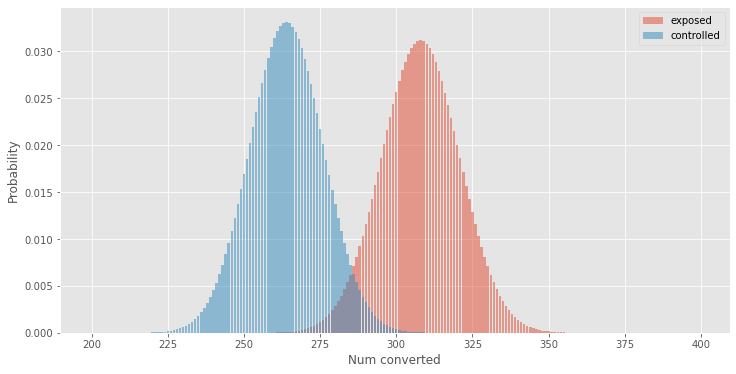

In [272]:
# Determine the probability of having x number of yes
no_of_yes = np.arange(200, 400)
prob_a = binom(exposed1, rate_e).pmf(no_of_yes)
prob_b = binom(controll1, rate_c).pmf(no_of_yes)
# Make the bar plots.
figure(figsize=(12,6))

plt.bar(no_of_yes, prob_a, label="exposed", alpha=0.5)
plt.bar(no_of_yes, prob_b, label="controlled", alpha=0.5)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");


We can see that the exposed group has an edge but it is certainly possible that if we pick 2 random points controlled might actually be higher than exposed

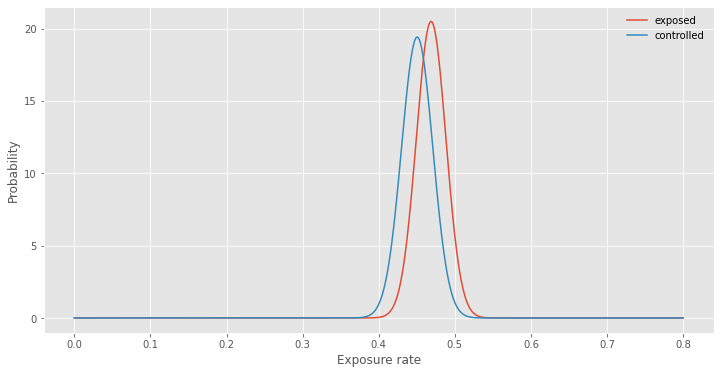

In [285]:
from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_e* (1 - rate_e) / exposed1)
std_b = np.sqrt(rate_c * (1 - rate_c) / controll1)

click_rate = np.linspace(0, 0.8, 1500)
prob_a = norm(rate_e, std_a).pdf(click_rate)
prob_b = norm(rate_c, std_b).pdf(click_rate)

# Make the bar plots.
figure(figsize=(12,6))

plt.plot(click_rate, prob_a, label="exposed")
plt.plot(click_rate, prob_b, label="controlled")
plt.legend(frameon=False)
plt.xlabel("Exposure rate"); plt.ylabel("Probability");


zscore is 0.646, with p-value 0.259


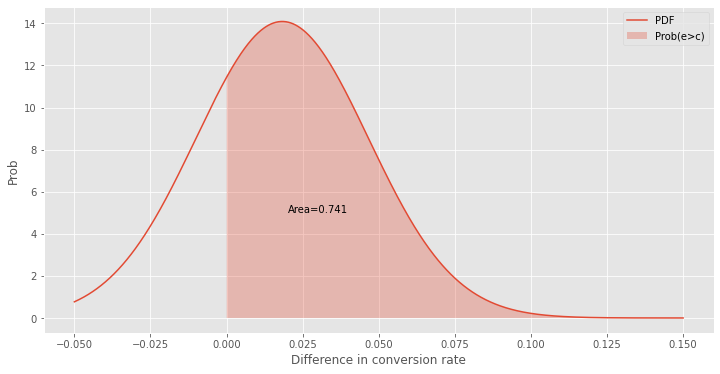

In [328]:
z_score = (rate_e - rate_c) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_e - rate_c, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
figure(figsize=(12,6))

plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(e>c)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

Using our frequentist approach we would say given the null hypothesis is true(that exposed is > than controlled) we would expect to get this value 25% of the time.As that is not a significant result (typically p < 5%), we fail to reject the null hypothesis, and state that we have evidence that exposed leads to more brand awareness.

In [335]:
def confidence(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(confidence(yes_c, controll1,yes_e, exposed1 ))

0.2591726745827285


In [330]:
def get_confidence_ab_test(number_exposed,total_exposed,number_controlled,total_controlled):
    rate_exposed = number_exposed/total_exposed
    rate_controlled= number_controlled/total_controlled
    std_exposed =  np.sqrt(rate_exposed * (1 - rate_exposed) / number_exposed)
    std_controlled =  np.sqrt(rate_controlled * (1 - rate_controlled) / number_controlled)
    z_score = (rate_controlled - rate_exposed) / np.sqrt(std_exposed**2 + std_controlled**2)
    return norm.cdf(z_score)

In [290]:
print(get_confidence_ab_test(yes_e, exposed1,yes_c, controll1 ))

0.33084439878188165


In [345]:
# Draw 10000 samples of possible rates for a and b
n = 1565
rates_a = norm(rate_e, std_a).rvs(n)
rates_b = norm(rate_c, std_b).rvs(n)
b_better = (rates_a > rates_b).sum() / n
print(f"exposed is better than controlled {b_better * 100:0.1f}% of the time")

exposed is better than controlled 72.7% of the time


# Welsch T test

In [340]:
from scipy.stats import ttest_ind
a_dist = np.zeros(exposed1)
a_dist[:yes_e] = 1
b_dist = np.zeros(controll1)
b_dist[:yes_c] = 1
zscore, prob = ttest_ind(a_dist, b_dist, equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.3f} (two tailed), {prob/2:0.3f} (one tailed)")

Zscore is 0.65, p-value is 0.519 (two tailed), 0.259 (one tailed)


In [347]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis exposed > controled is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis exposed > controled is 0.741


## Bayesian Approach Not working YET

In [296]:
import numpy as np

def get_prior(x):
    p, delta = x
    if not 0 < p < 1:
        return -np.inf
    if not 0 < p + delta < 1:
        return -np.inf
    if not -0.1 < delta < 0.1:
        return -np.inf
    return 0

def get_likelihood(x):
    p, delta = x
    return norm().logpdf((p - rate_e) / std_a) + norm().logpdf((p + delta - rate_c) / std_b)

def get_posterior(x):
    prior = get_prior(x)
    if np.isfinite(prior):
        return prior + get_likelihood(x)
    return prior

In [30]:
#! pip install emcee
#!pip install chainconsumer

In [297]:
import emcee
ndim = 2  # How many parameters we are fitting. This is our dimensionality.
nwalkers = 30  # Keep this well above your dimensionality.
p0 = np.random.uniform(low=0, high=0.1, size=(nwalkers, ndim))  # Start points
sampler = emcee.EnsembleSampler(nwalkers, ndim, get_posterior)
state = sampler.run_mcmc(p0, 1000)  # Tell each walker to take some steps

chain = sampler.chain[:, 200:, :]  # Throw out the first 200 steps
flat_chain = chain.reshape((-1, ndim))  # Stack the steps from each walker
print(flat_chain)

[[ 0.48805217 -0.0326748 ]
 [ 0.49098646 -0.03480494]
 [ 0.49526054 -0.03264283]
 ...
 [ 0.42365809  0.03145041]
 [ 0.42365809  0.03145041]
 [ 0.42365809  0.03145041]]


# Cleaning the data for machine learning

In [32]:
!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split


In [386]:
from sklearn.preprocessing import LabelEncoder
answered1 = answered
answered1
lb = LabelEncoder()
cols = ['date','device_make','browser']
#for x in cols:
 #   x_train[x] = lb.fit_transform(x_train[x])
  #  x_test[x] = lb.transform(x_test[x])
answered1['browser'] = lb.fit_transform(answered1['browser'])
answered1['device_make'] = lb.fit_transform(answered1['device_make'])
answered1['date'] = lb.fit_transform(answered1['date'])
answered1['experiment'] = lb.fit_transform(answered1['experiment'])
answered1['platform_os'] = lb.fit_transform(answered1['platform_os'])

C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [387]:
answered1.head()

auction_id  experiment  date  hour  device_make  \
2   0016d14a-ae18-4a02-a204-6ba53b52f2ed           1     2     2            4   
16  008aafdf-deef-4482-8fec-d98e3da054da           1     1    16           13   
20  00a1384a-5118-4d1b-925b-6cdada50318d           1     3     8           13   
23  00b6fadb-10bd-49e3-a778-290da82f7a8d           0     5     4           43   
27  00ebf4a8-060f-4b99-93ac-c62724399483           0     0    15           13   

    platform_os  browser  yes  no  answere  
2             1        2    0   1        0  
16            1        1    1   0        1  
20            1        1    0   1        0  
23            1        4    1   0        1  
27            1        1    0   1        0

In [470]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10
data3 = data2.drop(['yes','no','browser','device_make','auction_id'], axis=1)
#yes = answered[answered['answere'] == 1]
#yes = answered[answered['answere']]

x= answered1.drop(['answere','yes','no','auction_id'], axis = 1)#features for our modes
y=answered1['answere']#output for our model
# train is now 70% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#print(x_train.head(), x_val.head(), x_test.head())
x_test.head()

experiment  date  hour  device_make  platform_os  browser
4901           1     4     5           13            1        1
5519           0     2    16           67            1        4
5968           0     0    15           13            1        1
6040           0     0    15           13            1        1
3714           1     3     7           13            1        1

In [348]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

# ML a-b

In [171]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [144]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Answere')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

# Linear regression

In [471]:
import statsmodels.api as sm
X_train_refined = x_train
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [472]:
X_test_refined = x_test
y_preds = linear_regression.predict(X_test_refined)

In [473]:
calculate_metrics(y_test, y_preds)


RMSE Score: 0.4998239577084889
R2_Squared: -0.0008973906225056005
MAE Score: 0.49384226797122704


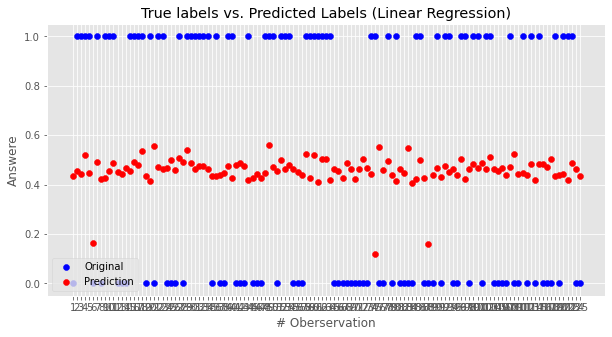

In [458]:
plot_preds(y_test, y_preds, 'Linear Regression')


In [459]:
print(linear_regression.summary())


                                 OLS Regression Results                                
Dep. Variable:                answere   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              126.3
Date:                Sat, 15 Aug 2020   Prob (F-statistic):                   1.57e-114
Time:                        19:32:46   Log-Likelihood:                         -628.01
No. Observations:                 870   AIC:                                      1268.
Df Residuals:                     864   BIC:                                      1297.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [460]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

Terms       p_value
4  platform_os  2.051489e-14
3  device_make  1.000771e-01
2         hour  1.714833e-01
5      browser  3.956796e-01
1         date  8.017359e-01
0   experiment  9.485488e-01

# Decision Tree

In [461]:

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.49483115796014665
R2_Squared: 0.020505812819302083
MAE Score: 0.47383540340256763


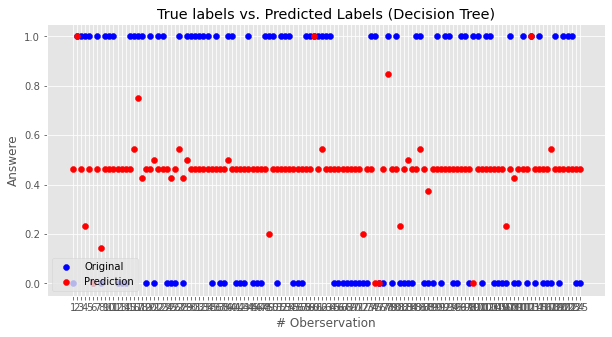

In [462]:
plot_preds(y_test, y_preds, 'Decision Tree')


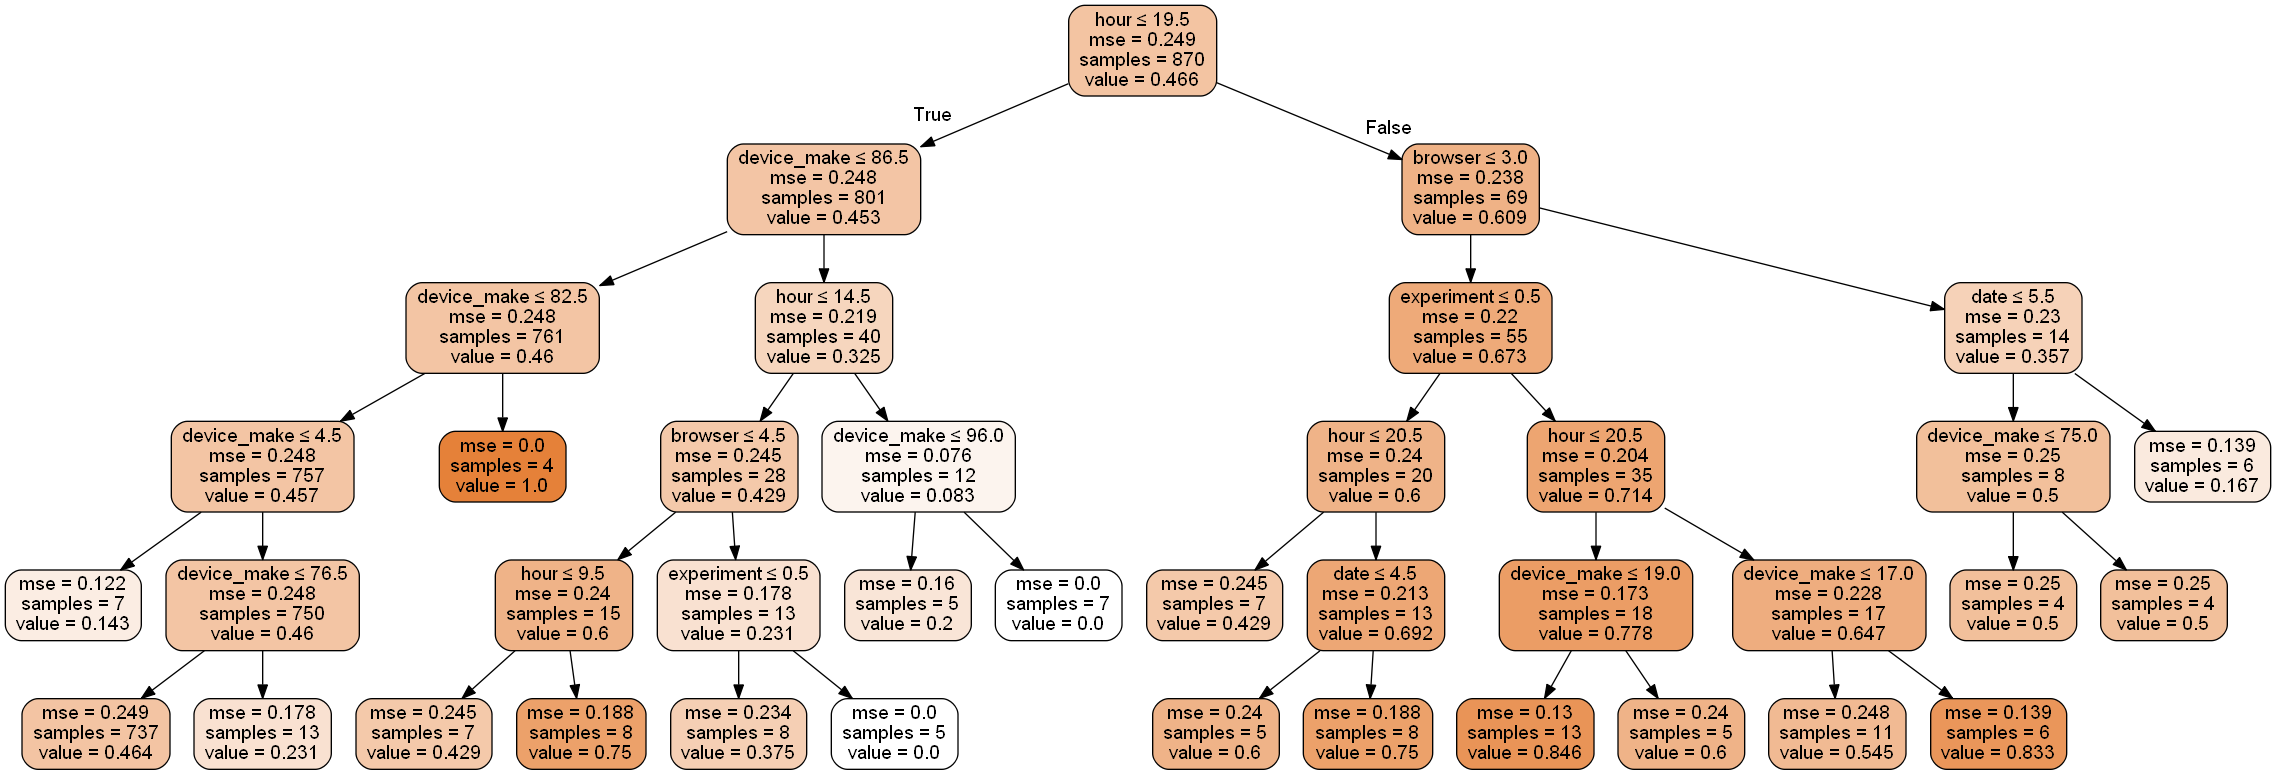

In [463]:
#!pip install --upgrade scikit-learn==0.20.3
#!pip install pydotplus
#!pip install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# xg boost

In [159]:
!pip install xgboost
import xgboost as xgb


In [183]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [184]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [465]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

[19:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [466]:
calculate_metrics(y_test, y_preds)


RMSE Score: 0.4999523485377725
R2_Squared: 0.0001266048689745336
MAE Score: 0.49942972826957704


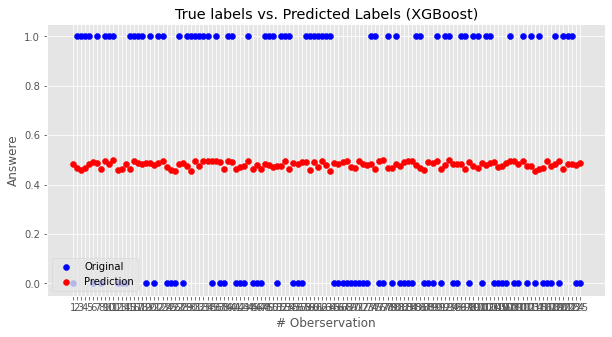

In [467]:
plot_preds(y_test, y_preds, 'XGBoost')


# logistic regression

In [189]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_refined)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.688862
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.004    
Dependent Variable: answere          AIC:              1210.6199
Date:               2020-08-15 14:25 BIC:              1239.2309
No. Observations:   870              Log-Likelihood:   -599.31  
Df Model:           5                LL-Null:          -601.92  
Df Residuals:       864              LLR p-value:      0.38847  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
experiment     0.1469    0.1434   1.0241  0.3058  -0.1342  0.4280
date          -0.0249    0.0273  -0.9131  0.3612  -0.0785  0.0286
hour    

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_refined, y_train)

C:\Users\Ken\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [191]:
y_pred = logreg.predict(X_test_refined)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_refined, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[56 21]
 [39  9]]


# Attempted questions

Answeres to questions ive attempted but not completed

In [320]:
#Show the % split between users who saw new vs old page
#Calculate pooled probability
mask = (answered["experiment"] == "control")
conversions_control = answered["answere"][mask].sum()
total_users_control = answered["answere"][mask].count()

mask = (answered["experiment"] == "exposed")
conversions_treatment = answered["answere"][mask].sum()
total_users_treatment = answered["answere"][mask].count()

print("Split of control users who saw old page vs treatment users who saw new page: ", 
          round(total_users_control / answered["answere"].count() * 100, 2), "% ",
          round((total_users_treatment / answered["answere"].count()) * 100, 2), "%")

#count number of users who converted in each group
print("Number of control users who answered yes on old advert: ", conversions_control)
print("Percentage of control users who answered yes: ", round((conversions_control / total_users_control) * 100, 2), "%")

mask = (answered["experiment"] == "exposed")
print("Number of treatment users who answered yes on new advert: ", conversions_treatment)
print("Percentage of treatment users who answered yes: ", round((conversions_treatment/ total_users_treatment) * 100, 2), "%")

Split of control users who saw old page vs treatment users who saw new page:  47.14 %  52.86 %
Number of control users who answered yes on old advert:  264
Percentage of control users who answered yes:  45.05 %
Number of treatment users who answered yes on new advert:  308
Percentage of treatment users who answered yes:  46.88 %


In [321]:
import statsmodels.stats.api as sms

#Check what sample size is required
baseline_rate = conversions_control / total_users_control
practical_significance = 0.05 #user defined
confidence_level = 0.05 #user defined, for a 95% confidence interval
sensitivity = 0.8 #user defined

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per group")

Required sample size:  1565  per group


In [322]:
#Calculate pooled probability
mask = (answered["experiment"] == "control")
conversions_control = answered["answere"][mask].sum()
total_users_control = answered["answere"][mask].count()

mask = (answered["experiment"] == "exposed")
conversions_treatment = answered["answere"][mask].sum()
total_users_treatment = answered["answere"][mask].count()

prob_pooled = (conversions_control + conversions_treatment) / (total_users_control + total_users_treatment)


In [325]:
import math

se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / total_users_control + 1 / total_users_treatment))
z_score = st.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of conversions(increased brand awareness) in the experiment and control groups
d_hat = (conversions_treatment / total_users_treatment) - (conversions_control / total_users_control)

#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error

if practical_significance < lower_bound:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")
    
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")

Do not reject the null hypothesis
The lower bound of the confidence interval is  -3.72 %
The upper bound of the confidence interval is  7.38 %


In [315]:
print(get_confidence_ab_test(yes_e, exposed1,yes_c, controll1 ))

0.33084439878188165


In [336]:
print(confidence(yes_e, exposed1,yes_c, controll1 ))

0.7408273254172715


In [337]:
print(confidence(yes_c, controll1,yes_e, exposed1 ))

0.2591726745827285


# Kfold -Not yet complete

## linear regression k fold

In [390]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x):
    #print('TRAIN:', train_index, 'test', test_index)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1 - train_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# fit a model

   

In [393]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
predictions[0:5]
print ('“Score:”', model.score(x_test, y_test))


“Score:” 0.005309790275545678


In [398]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=5)
print ('“Cross-validated scores:”', scores)

“Cross-validated scores:” [ 0.00663324 -0.03354799  0.00661992 -0.01712387 -0.00518051]


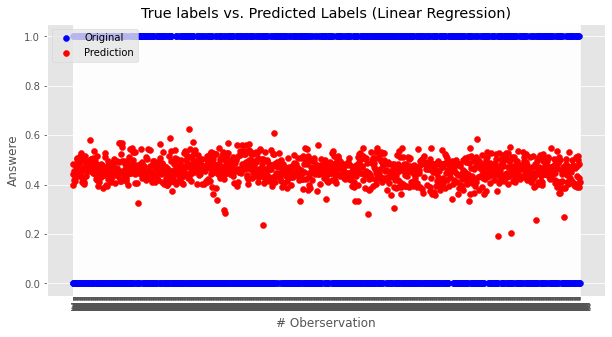

In [402]:
# Make cross validated predictions
predictions = cross_val_predict(model, x, y, cv=5)
plot_preds(y, predictions, 'Linear Regression')


In [406]:
print(model.pvalues())

AttributeError: 'LinearRegression' object has no attribute 'pvalues'

In [404]:
accuracy = metrics.r2_score(y, predictions)
accuracy

-0.004598344838504298

# Decision tree k fold

In [449]:
!pip install --upgrade sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,    cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Requirement already up-to-date: sklearn in c:\users\ken\anaconda2\envs\py36\lib\site-packages (0.0)


ImportError: cannot import name 'plot_tree'

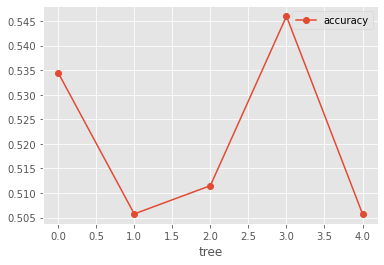

In [452]:
from sklearn.tree import DecisionTreeClassifier
df_dtc = DecisionTreeClassifier(random_state = 42)
df_dtc = df_dtc.fit(x_train,y_train,cv)

scores = cross_val_score(df_dtc, x_train, y_train, cv = 5) 
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})
df.plot(x = 'tree', y = 'accuracy', marker = 'o')

In [453]:

dot_data = StringIO()

export_graphviz(df_dtc, out_file=dot_data, 
                feature_names=x_train.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [454]:
y_preds = df_dtc.predict(x_test)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.6985699678629192
R2_Squared: -0.9521249359959034
MAE Score: 0.488
